<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/2_3_Applied_Data_Science_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For today's lecture, we will be doing a mini applied Pandas project to show how you can gain insights from data.

First, let's read in our data:

In [ ]:
!git clone 'https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git'

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


In [ ]:
cd /content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/

/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data


In [ ]:
!ls

Sales_April_2019.csv	 Sales_January_2019.csv  Sales_May_2019.csv
Sales_August_2019.csv	 Sales_July_2019.csv	 Sales_November_2019.csv
Sales_December_2019.csv  Sales_June_2019.csv	 Sales_October_2019.csv
Sales_February_2019.csv  Sales_March_2019.csv	 Sales_September_2019.csv


Here, we have obtained Amazon Sales Data for each month in 2019. So far, we have been accustomed to seeing all our data conveniently located in one csv but in the case that we have multiple csv files to draw from, we can use a loop to conveniently store all our data in one place.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter


path = '/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data'

Year_Data = pd.DataFrame()

for file in os.listdir(path):
  print (file)

Sales_February_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_July_2019.csv


In [ ]:
for file in os.listdir(path):
  df = pd.read_csv(file)
  Year_Data = pd.concat([Year_Data, df])

In [ ]:
Year_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


From here, we need to find out if there are any NaN values in our data frame as it can get in the way of processing our data. 

In [ ]:
nan_df = Year_Data[Year_Data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Year_Data = Year_Data.dropna(how='all')
Year_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


Now that we have done our initial processing let's try to find out what month was the best for sales.

In [ ]:
Year_Data['Month'] = pd.to_datetime(Year_Data['Order Date']).dt.month

In [ ]:
Year_Data = Year_Data[Year_Data['Order Date'] !='Order Date']

In [ ]:
Year_Data['Month'] = pd.to_datetime(Year_Data['Order Date']).dt.month

In [ ]:
Year_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


In [ ]:
Year_Data['Revenue'] = Year_Data['Quantity Ordered'] * Year_Data['Price Each']
Year_Data.head()

In [ ]:
Year_Data['Quantity Ordered'] = pd.to_numeric(Year_Data['Quantity Ordered'])
Year_Data['Price Each'] = pd.to_numeric(Year_Data['Price Each'])
Year_Data['Revenue'] = Year_Data['Quantity Ordered'] * Year_Data['Price Each']
Year_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


In [ ]:
Year_Data.groupby('Month').sum()

,Quantity Ordered,Price Each,Revenue
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


range(1, 13)


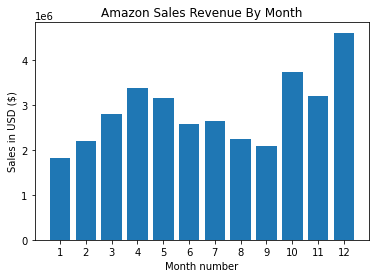

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,Year_Data.groupby(['Month']).sum()['Revenue'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Amazon Sales Revenue By Month')
plt.show()

Let's find out what time customers are buying the most products. This can influence the time the site launches the most ads.

In [ ]:
Year_Data['Hour'] = pd.to_datetime(Year_Data['Order Date']).dt.hour
Year_Data.head(20)

In [ ]:
Counts = Year_Data.groupby(['Hour'])['Month'].agg(['count'])
print(Counts)

      count
Hour       
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275


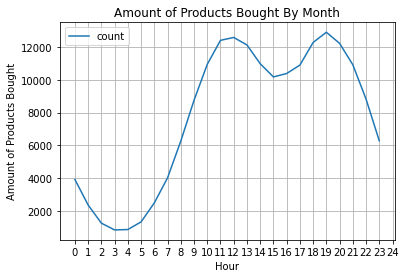

In [ ]:
x = np.linspace(0,24,25)
Counts.plot()
plt.xticks(x)
plt.ylabel('Amount of Products Bought')
plt.title('Amount of Products Bought By Month')
plt.grid()
plt.show()

Now, let's figure out what products were sold together the most.

In [ ]:
df = Year_Data[Year_Data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [ ]:

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Finally, let's look at what product sold the most overall.

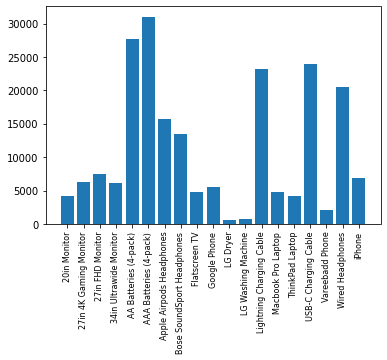

In [ ]:
product_group = Year_Data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()